In [6]:
import plotly
import pandas as pd
import plotly.graph_objs as go
import country_converter as coco
plotly.offline.init_notebook_mode(connected=True)

In [3]:
cols2skip = [0]
cols = [i for i in range(100) if i not in cols2skip]

df_raw = pd.read_excel('./eb_90_volume_A.xls', sheet_name="QD11.3", skiprows=8, usecols=cols)
df_raw.rename(columns={'UE28\nEU28':'EU28', 'UE28-UK\nEU28-UK':'EU28-UK' }, inplace=True)
df = df_raw.transpose()
df = df.rename(columns=df.iloc[0])
df = df.iloc[1:]

names = df.index.tolist()
names = ['GR' if (x == 'EL') else x for x in names]
names = ['GB' if (x == 'UK') else x for x in names]
iso3 = coco.convert(names=names, to='ISO3', not_found=None)

In [4]:
data = [go.Choropleth(
    locations = iso3,
    z = df['Tend to agree'] * 100,
    text = iso3,
    locationmode="ISO-3",
    reversescale=True,
    colorscale="Blues",
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(0,0,0)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        ticksuffix = '%',
        title = '% identify',
        len=0.5,
    ),
)]

layout = {
    "height": 700,
    "width": 700,
    "margin"
    : {"t": 0, "b": 0, "l": 0, "r": 0},
    "geo": {
        "lataxis": {"range": [36.0, 65.0]}, 
        "lonaxis": {"range": [-12.0, 36.0]}, 
        "projection": {"type": "transverse mercator"}, 
        "resolution": 50, 
        "showcoastlines": True, 
        "showframe": True, 
        "showcountries": True,
    }
}

fig = go.Figure(data = data, layout = layout)

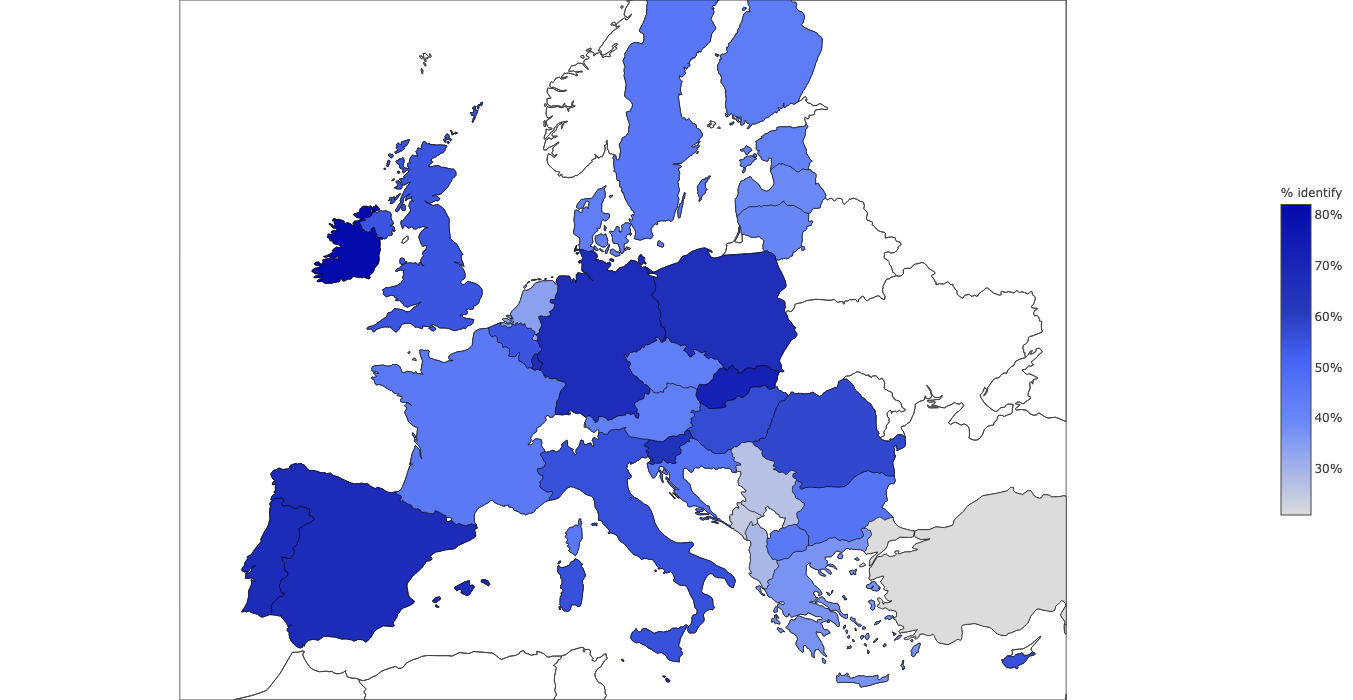

In [7]:
plotly.offline.iplot(fig)